In [35]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Search for best hyperparameters using GridSearchCV and RandomForestRegressor

In [36]:
cars = pd.read_csv("final_cars.csv")

In [37]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [38]:
X = pd.get_dummies(X)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Set aside some data for testing

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [41]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [50,100] , 'max_features': [4,8]}]

In [42]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [43]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.8147799767970308 {'max_features': 4, 'n_estimators': 50}
0.8135325433404453 {'max_features': 4, 'n_estimators': 100}
0.834381948710524 {'max_features': 8, 'n_estimators': 50}
0.8218932321412471 {'max_features': 8, 'n_estimators': 100}


In [44]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 50}

In [45]:
grid_search.best_score_

0.834381948710524

In [46]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Build model with best estimator

In [47]:
model = grid_search.best_estimator_

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

In [50]:
np.sqrt(mse)

2267.153223237887

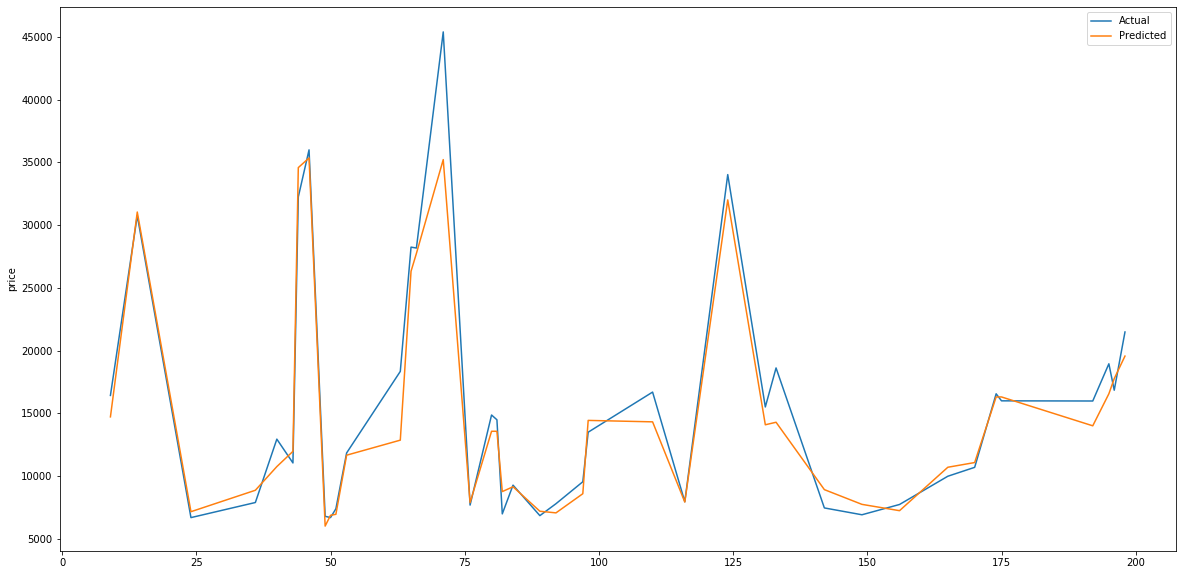

In [51]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")